In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [13]:
## Your code here
df.Runs = df.Runs.apply(lambda x: x.replace('*', ''))

In [15]:
df.Runs = df.Runs.astype('int32')

In [18]:
df.Runs.describe()
# difference between 50th% and 25th% is 32.5 - 10.0 = 22.5 (option b)

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


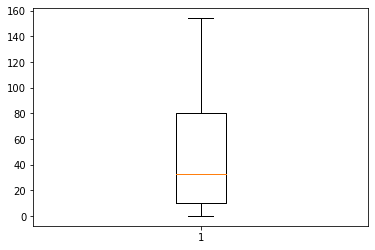

In [20]:
#Your code here
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [26]:
df['Start Date']

0      18-Aug-08
1      20-Aug-08
2      24-Aug-08
3      27-Aug-08
4      29-Aug-08
         ...    
127    26-Oct-16
128    29-Oct-16
129    15-Jan-17
130    19-Jan-17
131    22-Jan-17
Name: Start Date, Length: 132, dtype: object

In [30]:
pd.to_datetime(df['Start Date'], errors='coerce').dt.year

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
127    2016
128    2016
129    2017
130    2017
131    2017
Name: Start Date, Length: 132, dtype: int64

In [38]:
## Your code here
df['Year'] = pd.to_datetime(df['Start Date'], errors='coerce').dt.year

In [50]:
df['Year'].value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2016    10
2015    10
2009     6
2008     5
2017     3
Name: Year, dtype: int64

In [52]:
pd.pivot_table(df, values='Runs', index='Year', aggfunc=['mean','max'])

,mean,max
,Runs,Runs
Year,,
2008,31.800000,54
2009,38.333333,107
2010,45.375000,118
2011,42.000000,117
2012,40.363636,128
2013,47.826087,115
2014,58.529412,139
2015,30.400000,138


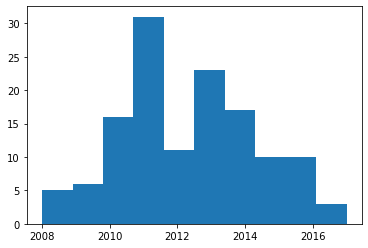

<AxesSubplot:title={'center':'Runs'}, xlabel='Year'>

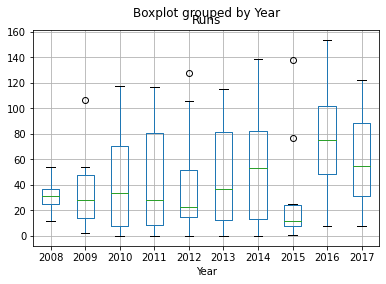

In [49]:
plt.hist(df['Year'])
plt.show()
df.boxplot(column='Runs', by='Year')

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [58]:
df.Mins.describe()
df = df[~(df.Mins == '-')]
df.Mins.describe()

count     126
unique     92
top         9
freq        4
Name: Mins, dtype: object

In [59]:
df.Mins = df.Mins.astype('int32')

In [60]:
df.Mins.describe()

count    126.000000
mean      70.492063
std       57.270131
min        1.000000
25%       18.250000
50%       56.000000
75%      120.750000
max      202.000000
Name: Mins, dtype: float64

(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

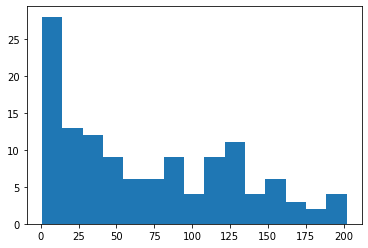

In [61]:
#Your code here
plt.hist(df.Mins, bins=15)